# Hangar Tutorial 

## Part 1: Begining

This tutorial will review the first steps of working with a hangar repository. 

To fit with the beginner's theme, we will use the MNIST dataset. Later examples will show off how to work with much more complex data.

### Requirements

... fill in requirements

In [ ]:
from hangar import Repository

import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt

from tqdm import tqdm

### Creating & Interacting with a Hangar Repository

Hangar is designed to "just make sense" in every operation you have to perform. As such, there is a single interface which all interaction begins with:
the `Repository` object. 

Weather a hangar repository exists at the path you specify or not, just tell hangar where it should live!

#### Intitializing a repository

The first time you want to work with a new repository, the `init()` method must be called. This is where you provide hangar with your name and email address (to be used in the commit log), as well as implicitly confirming that you do want to create the underlying data files hangar uses on disk. 

In [ ]:
repo = Repository(path='/Users/rick/projects/tensorwerk/hangar-dev-repo/')

# First time a repository is accessed only!
# Note: if you feed a path to the `Repository` which does not contain a pre-iniitlized hangar repo, 
# when the Repository object is initialized it will let you know that you need to run `init()`

repo.init(user_name='Rick Izzo', user_email='rick@tensorwerk.com', remove_old=True)

In [ ]:
repo

#### Checking out the repo for writing

A repository can be checked out in two modes: 

1) write-enabled: applies all operations to the staging area's current state. Only one write-enabled checkout can be active at a different time, must be closed upon last use, or manual intervention will be needed to remove the writer lock. 
    
2) read-only: checkout a commit or branch to view repository state as it existed at that point in time. 

In [5]:
co = repo.checkout(write=True)

#### Lots of useful information is in the ipython `__repr__`

#### A checkout allows access to `datasets` and `metadata`

In [9]:
co.metadata


 Hangar Metadata                
     Number of Keys : 0                
     Access Mode    : a

In [10]:
# Load the dataset
with gzip.open('/Users/rick/projects/tensorwerk/hangar-dev-data/mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='bytes')

def rescale(array):
    array = array * 256
    rounded = np.round(array)
    return rounded.astype(np.uint8())

sample_trimg = rescale(train_set[0][0])
sample_trlabel = np.array([train_set[1][0]])
trimgs = rescale(train_set[0])
trlabels = train_set[1]

#### Before data can be added to a repository, a dataset must be initialized. 

A Dataset is a named grouping of data samples where each sample shares a number of similar attributes and array properties:
```
Datasets are groups of related data pieces (samples). All samples within
a dataset have the same data type, and number of dimensions. The size of
each dimension can be either fixed (the default behavior) or variable
per sample.

For fixed dimension sizes, all samples written to the dataset must have
the same size that was initially specified upon dataset initialization.
Variable size datasets on the other hand, can write samples with
dimensions of any size less than a maximum which is required to be set
upon datset creation.

Parameters
----------
name : str
    The name assigned to this dataset.
    
shape : tuple, optional
    The shape of the data samples which will be written in this dataset.
    This argument and the `dtype` argument are required if a `prototype`
    is not provided, defaults to None
    
dtype : np.dtype, optional
    The datatype of this dataset. This argument and the `shape` argument
    are required if a `prototype` is not provided., defaults to None
    
prototype : np.array, optional
    A sample array of correct datatype and shape which will be used to
    initialize the dataset storage mechanisms. If this is provided, the
    `shape` and `dtype` arguments must not be set, defaults to None
    
samples_are_named : bool, optional
    If the samples in the dataset have names associated with them. If set,
    all samples must be provided names, if not, no name will be assigned.
    defaults to True, which means all samples should have names.
    
variable_shape : bool, optional
    If this is a variable sized dataset. If true, a `max_shape` argument
    must be specified, defaults to False
    
max_shape : tuple of int, optional
    The maximum size for each dimension which a data sample can be set
    with. The number of dimensions must match that specified in the
    `shape` or `prototype` argument, and each dimension size must be >=
    the equivalent dimension size specified. defaults to None
```

In [11]:
co.datasets.init_dataset(name='mnist_training_images', prototype=trimgs[0])

Dataset prototype shape: (784,), dtype: uint8



 Hangar DatasetDataWriter                 
    Dataset Name     : mnist_training_images                
    Schema UUID      : 0d337900557911e98d758c859047adef                
    Schema Hash      : RM4DefFsjRs=                
    Variable Shape   : False                
    (max) Shape      : (784,)                
    Datatype         : <class 'numpy.uint8'>                
    Named Samples    : True                
    Access Mode      : a                
    Num Samples      : 0


In [14]:
co.datasets['mnist_training_images']


 Hangar DatasetDataWriter                 
    Dataset Name     : mnist_training_images                
    Schema UUID      : 0d337900557911e98d758c859047adef                
    Schema Hash      : RM4DefFsjRs=                
    Variable Shape   : False                
    (max) Shape      : (784,)                
    Datatype         : <class 'numpy.uint8'>                
    Named Samples    : True                
    Access Mode      : a                
    Num Samples      : 0


### Interaction 

When a dataset is initialized, a dataset accessor object will be returned, however, depending on your use case, this may or may not be the most convenient way to access a dataset.

In general, we have implemented a full `dict` mapping interface ontop of all object. To access the `'mnist_training_images'` dataset you can just use a dict style access like the following (note: if operating in ipython/jupyter, the dataset keys will autocomplete for you).

In [15]:
co.datasets['mnist_training_images']


 Hangar DatasetDataWriter                 
    Dataset Name     : mnist_training_images                
    Schema UUID      : 0d337900557911e98d758c859047adef                
    Schema Hash      : RM4DefFsjRs=                
    Variable Shape   : False                
    (max) Shape      : (784,)                
    Datatype         : <class 'numpy.uint8'>                
    Named Samples    : True                
    Access Mode      : a                
    Num Samples      : 0


In [16]:
train_dset = co.datasets['mnist_training_images']

the full dictionary style mapping interface is implemented

#### Adding Data

To add data to a named dataset, we can use dict-style setting, or the `.add` method.

In [17]:
train_dset['0'] = trimgs[0]
train_dset.add(data=trimgs[1], name='1')

train_dset['51'] = trimgs[51]

#### How many samples are in the dataset?

In [18]:
len(train_dset)

3

#### containment testing

In [19]:
'hi' in train_dset

False

In [20]:
'0' in train_dset

True

#### Dictionary Style Retrieval for known keys

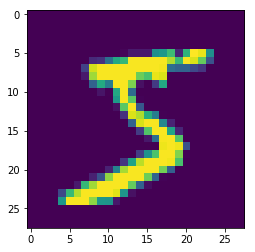

In [22]:
out = train_dset['0']
plt.imshow(out.reshape(28, 28))

In [23]:
train_dset


 Hangar DatasetDataWriter                 
    Dataset Name     : mnist_training_images                
    Schema UUID      : 0d337900557911e98d758c859047adef                
    Schema Hash      : RM4DefFsjRs=                
    Variable Shape   : False                
    (max) Shape      : (784,)                
    Datatype         : <class 'numpy.uint8'>                
    Named Samples    : True                
    Access Mode      : a                
    Num Samples      : 3


### Dict style iteration supported out of the box

0
1
51


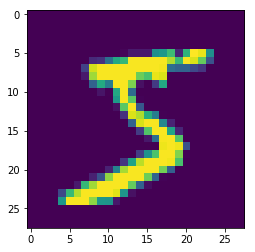

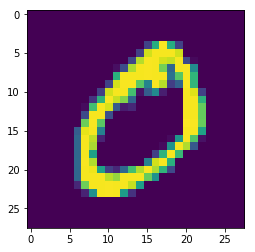

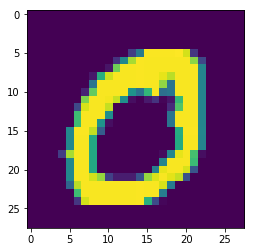

In [24]:
for k in train_dset:   
    # equivalent method: for k in train_dset.keys():
    print(k)
    
    
for v in train_dset.values():
    plt.imshow(v.reshape(28, 28))
    plt.show()
    
myDict = {}
for k, v in train_dset.items():
    myDict[k] = v

#### Performance

Once you've completed an interactive exploration, be sure to use the context manager form of the `.add` and `.get` methods! 

In order to make sure that all your data is always safe in Hangar, the backend dilligently ensures that all contexts are opened and closed appropriatly. 

When you use the context manager form of a dataset object, we can offload a significat amount of work to the python runtime, and dramatically increase read and write speeds.

Most datasets we've tested see an increased throughput differential of ~250% for writes and ~300% for reads when comparing using the context manager form vs the naked form!

In [25]:
dset_trimgs = co.datasets.init_dataset(name='train_images', prototype=sample_trimg, samples_are_named=True)
dset_trlabels = co.datasets.init_dataset(name='train_labels', prototype=sample_trlabel, samples_are_named=True)

pbar = tqdm(total=trimgs.shape[0])
with dset_trimgs, dset_trlabels:
    for idx, img in enumerate(trimgs):
        if (idx % 500 == 0):
            pbar.update(500)

        dset_trimgs.add(data=img, name=str(idx))
        dset_trlabels.add(data=np.array([trlabels[idx]]), name=str(idx))
        
pbar.close()

Dataset prototype shape: (784,), dtype: uint8
Dataset prototype shape: (1,), dtype: int64


100%|██████████| 50000/50000 [00:24<00:00, 1945.37it/s]


## Commiting Changes

Once you have made a set of changes you wan't to commit, just simply call the `commit()` method (and pass in a message)!

In [26]:
co.commit('hello world, this is my first hangar commit')

(10678802, 2353457, 65536)


'f8b1f7a139fa1745'

In [28]:
repo.summary()

Summary of Contents Contained in Data Repository 
 
| Repository Info 
|----------------- 
|  Directory: /Users/rick/projects/tensorwerk/hangar-dev-repo/__hangar 
|  Disk Usage: 46.14 MB 
 
| Commit Details 
------------------- 
|  Commit: f8b1f7a139fa1745 
|  Created: Tue Apr  2 18:59:26 2019 
|  By: Rick Izzo 
|  Email: rick@tensorwerk.com 
|  Message: hello world, this is my first hangar commit 
 
| DataSets 
|----------------- 
|  Number of Named Datasets: 3 
|
|  * Dataset Name: mnist_training_images 
|    Num Arrays: 3 
|    Details: 
|    - schema_uuid: 0d337900557911e98d758c859047adef 
|    - schema_hash: RM4DefFsjRs= 
|    - schema_dtype: 2 
|    - schema_is_var: False 
|    - schema_max_shape: [784] 
|    - schema_is_named: True 
|
|  * Dataset Name: train_images 
|    Num Arrays: 50000 
|    Details: 
|    - schema_uuid: 5a72bbf4557911e994018c859047adef 
|    - schema_hash: RM4DefFsjRs= 
|    - schema_dtype: 2 
|    - schema_is_var: False 
|    - schema_max_shape: [784] 
|  

In [29]:
repo.create_branch('testbranch') # cleanup and switch 

'testbranch'

In [30]:
co.datasets.remove_dset('mnist_training_images')

True

In [31]:
co.datasets


 Hangar Datasets                
     Writeable: True                
     Dataset Names:                
       - train_images
       - train_labels

In [32]:
co.commit('removed some datasets')

(10678231, 2353360, 65536)


'4e320e8516ff275f'

In [34]:
co.close()

In [35]:
co = repo.checkout(write=True, branch_name='testbranch')

In [36]:
co.metadata['hello'] = 'world'

In [38]:
co.datasets


 Hangar Datasets                
     Writeable: True                
     Dataset Names:                
       - mnist_training_images
       - train_images
       - train_labels

In [ ]:
co.commit('commit on testbranch')

### Don't Forget to Close the Write-Enabled Checkout to Release the Lock!

In [ ]:
# Just call...

co.close()

#### But if you did forget, and you recieve a `PermissionError` next time you open a checkout

```
PermissionError: Cannot aquire the writer lock. Only one instance of
a writer checkout can be active at a time. If the last checkout of this 
repository did not properly close, or a crash occured, the lock must be
manually freed before another writer can be instantiated.
```

It's an easy fix! JUST BE CAREFUL!

In [ ]:
repo.force_release_writer_lock()

# inspecting state from the top!

After your first commit, the summary and log methods will begin to work, and you can either print the stream to the console (as shown below), or you can 
dig deep into the internal of how hangar thinks about your data! (To be covered in an advanced tutorial later on). 

The point is, regardless of your level of interaction with a live hangar repository, all level of state is accessable from the top, and in general has been built to be the only way to directly access it!

In [ ]:
repo.summary()

In [ ]:
repo.log()